# 5. Researchers  

This Notebook shows how it's possible to extract researchers data related to  Rome University programmatically, using the Dimensions API with Jupyter Notebooks. 


In [17]:
import dimcli
from dimcli.shortcuts import dslquery, dslqueryall
import pandas as pd
from pandas.io.json import json_normalize
import plotly_express as px
from plotly.offline import init_notebook_mode # needed for exports 
init_notebook_mode(connected=True)

Dimensions data source are mined for organizations identifiers using GRID, the [Global Research Identifier Database](https://grid.ac/). So we can use GRID IDs to perform searches across all source in Dimensions. 

The GRID ID for Rome La Sapienza is [grid.7841.a](https://grid.ac/institutes/grid.7841.a). 


In [18]:
GRIDID = "grid.7841.a"

## Researchers currently affiliated to this university, by number of publications

In [19]:
data = dslquery(f"""search researchers where current_research_org="{GRIDID}" and obsolete=0 return researchers[basics+total_publications] sort by total_publications limit 100""")
df = data.as_dataframe()
df["full_name"] = df["first_name"] + " " + df["last_name"]
df.head(10)

Returned Researchers: 100 (total = 19597)


,first_name,id,last_name,orcid_id,research_orgs,total_publications,full_name
0,Shahram,ur.013334067161.01,Rahatlou,[0000-0001-9794-3360],"[{'id': 'grid.420929.4', 'acronym': 'LIP', 'na...",1103,Shahram Rahatlou
1,Egidio,ur.016577466761.29,Longo,[0000-0001-6238-6787],"[{'id': 'grid.420929.4', 'acronym': 'LIP', 'na...",1024,Egidio Longo
2,Torello Maria,ur.01004616634.01,Lotti,NaN,"[{'id': 'grid.8404.8', 'name': 'University of ...",869,Torello Maria Lotti
3,Fabrizio,ur.015522075720.46,Margaroli,[0000-0002-3869-0153],"[{'id': 'grid.470218.8', 'name': 'INFN Sezione...",856,Fabrizio Margaroli
4,Massimo,ur.0603163377.07,Volpe,[0000-0002-9642-8380],"[{'id': 'grid.7400.3', 'acronym': 'UZH', 'name...",853,Massimo Volpe
5,Stefano,ur.011001734565.36,Giagu,[0000-0001-9192-3537],"[{'id': 'grid.6045.7', 'acronym': 'INFN', 'nam...",774,Stefano Giagu
6,Guido,ur.01360745012.13,Valesini,NaN,"[{'id': 'grid.420089.7', 'acronym': 'NICHD', '...",714,Guido Valesini
7,Riccardo,ur.0744774354.40,Faccini,[0000-0003-2613-5141],"[{'id': 'grid.470206.7', 'name': 'INFN Sezione...",710,Riccardo Faccini
8,Maurizio,ur.01351106567.44,Brunori,[0000-0002-7795-1635],"[{'id': 'grid.431860.8', 'name': 'AT&T (United...",686,Maurizio Brunori
9,Massimino,ur.0750640573.00,D'Armiento,NaN,"[{'id': 'grid.158820.6', 'name': 'University o...",675,Massimino D'Armiento


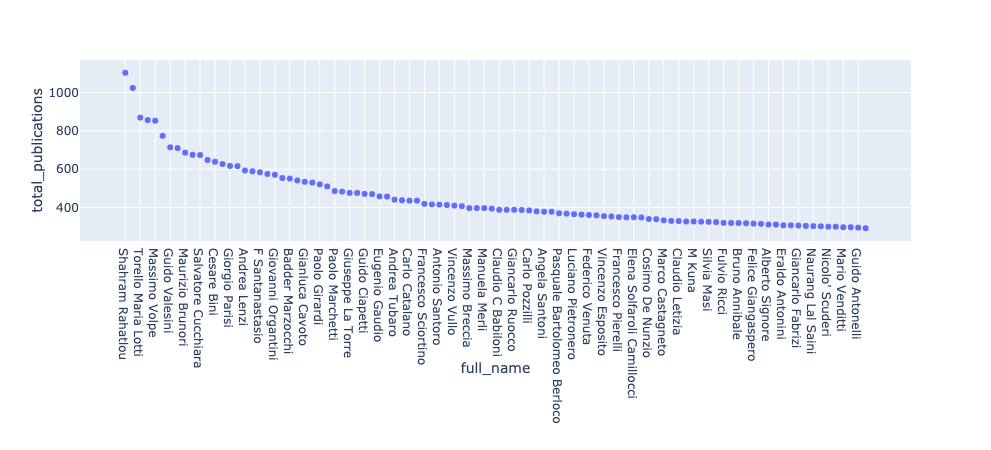

In [20]:
px.scatter(df, x="full_name", y="total_publications", hover_name="full_name", 
           hover_data=['id', 'total_publications'], 
           height=600, title="")

## Researchers affiliated to this university (at any time), by number of publications

In [21]:
data = dslquery(f"""search researchers where research_orgs="{GRIDID}" and obsolete=0 return researchers[basics+total_publications] sort by total_publications limit 100""")
df = data.as_dataframe()
df["full_name"] = df["first_name"] + " " + df["last_name"]
df.head(10)

Returned Researchers: 100 (total = 35726)


,first_name,id,last_name,orcid_id,research_orgs,total_publications,full_name
0,Y Huda,ur.01010756664.44,Shoenfeld,NaN,"[{'id': 'grid.10737.32', 'name': 'Nice Sophia ...",1907,Y Huda Shoenfeld
1,Antonio,ur.01327132640.85,Gasbarrini,NaN,"[{'id': 'grid.39936.36', 'acronym': 'CUA', 'na...",1634,Antonio Gasbarrini
2,Claus Detlef,ur.012561241352.36,Claussen,NaN,"[{'id': 'grid.10392.39', 'name': 'University o...",1423,Claus Detlef Claussen
3,Giovanni Battista,ur.0655503040.12,Gasbarrini,NaN,"[{'id': 'grid.419843.3', 'name': 'Oasi Maria S...",1401,Giovanni Battista Gasbarrini
4,Alfred W B,ur.0734455677.90,Forchel,[0000-0002-9377-9935],"[{'id': 'grid.10392.39', 'name': 'University o...",1389,Alfred W B Forchel
5,Thomas Felix,ur.0641760460.60,Lüscher,NaN,"[{'id': 'grid.7400.3', 'acronym': 'UZH', 'name...",1374,Thomas Felix Lüscher
6,Carlo Maria,ur.01114633117.26,Croce,NaN,"[{'id': 'grid.452350.5', 'acronym': 'IHS', 'na...",1353,Carlo Maria Croce
7,Giovanni,ur.0640734655.22,Scambia,NaN,"[{'id': 'grid.18147.3b', 'name': 'University o...",1345,Giovanni Scambia
8,Gian Carlo,ur.014170451002.23,Comi,NaN,"[{'id': 'grid.18147.3b', 'name': 'University o...",1228,Gian Carlo Comi
9,Massimo,ur.0776664553.33,Filippi,[0000-0002-5485-0479],"[{'id': 'grid.410345.7', 'name': 'Ospedale San...",1220,Massimo Filippi


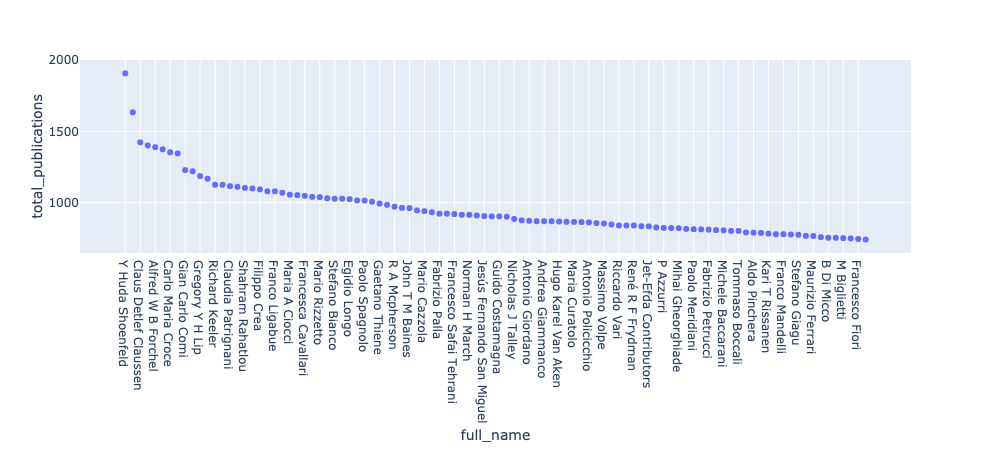

In [22]:
px.scatter(df, x="full_name", y="total_publications", hover_name="full_name", 
           hover_data=['id', 'total_publications'], 
           height=600, title="")

## Combining and comparing 'current' VS 'all-time' top researchers

In order to do this, let's add the `current_research_org` value to the result, so that we can pivot on it in our visualization. 

In [23]:
data = dslquery(f"""search researchers where research_orgs="{GRIDID}" and obsolete=0 
                return researchers[basics+total_publications+current_research_org] sort by total_publications limit 100""")
df = data.as_dataframe()
df["full_name"] = df["first_name"] + " " + df["last_name"]

Returned Researchers: 100 (total = 35726)


Let's plot the top 100

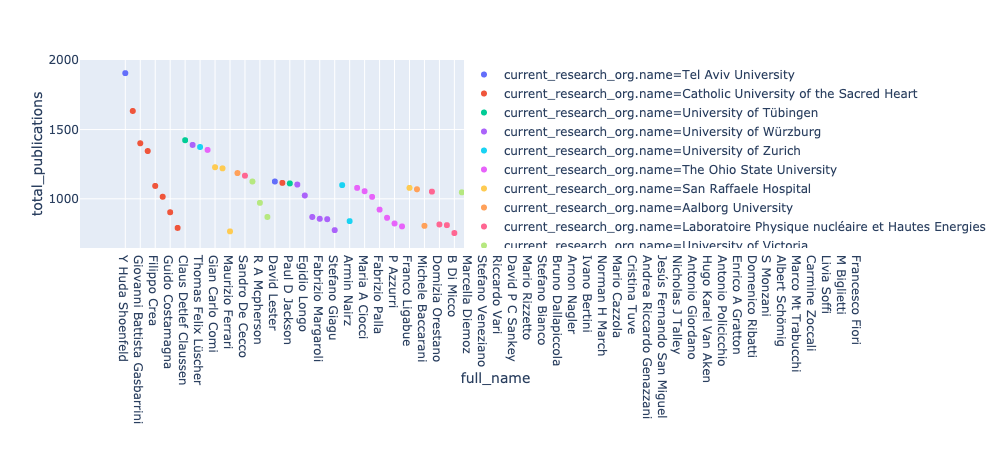

In [24]:
px.scatter(df[:100], x="full_name", y="total_publications", hover_name="full_name", color="current_research_org.name",
           hover_data=['id', 'total_publications'], 
           height=600, title="")

## Where did researchers move to?

By using the `current_research_org` value we can get a quick overview of where high-publishing researchers who used to be at the University of Rome are now.

In order to have a more complete picture, this time we take the top 1000 researchers. 


In [25]:
data = dslquery(f"""search researchers where research_orgs="{GRIDID}" and obsolete=0 and current_research_org is not empty
                return researchers[basics+total_publications+current_research_org] sort by total_publications limit 1000""")
df = data.as_dataframe()
df = df.rename(columns={"current_research_org.name": "org_name", "current_research_org.country_name": "org_country"})
df = df.fillna("empty") # fill empty values with a string
df["full_name"] = df["first_name"] + " " + df["last_name"]

Returned Researchers: 1000 (total = 32981)


Let's remove Rome University from this set 

In [26]:
df_minus_rome = df[df['current_research_org.id'] != GRIDID]

Now let's plot the data based on the other current research orgs

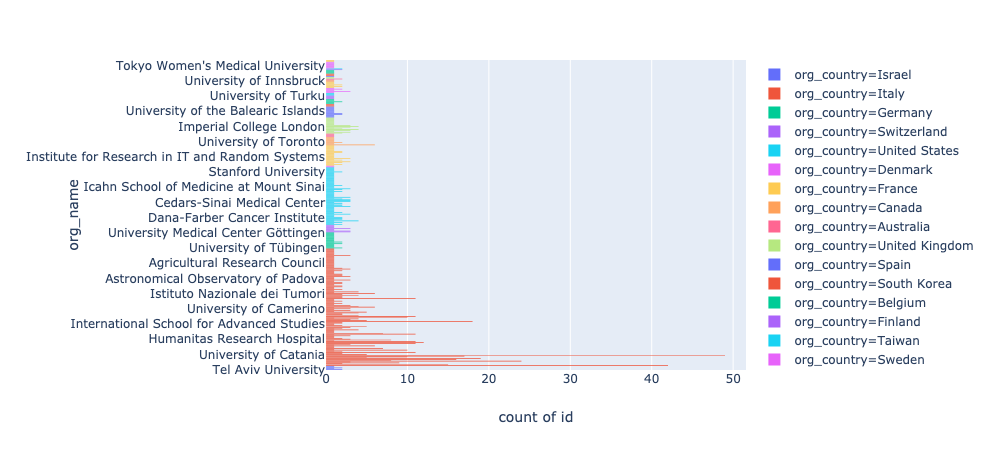

In [27]:
px.histogram(df_minus_rome, x="id", y="org_name", color="org_country",
             orientation='h', hover_name="org_name", hover_data=['current_research_org.id'])

## Where did top-performing (based on publications count) researchers move to?

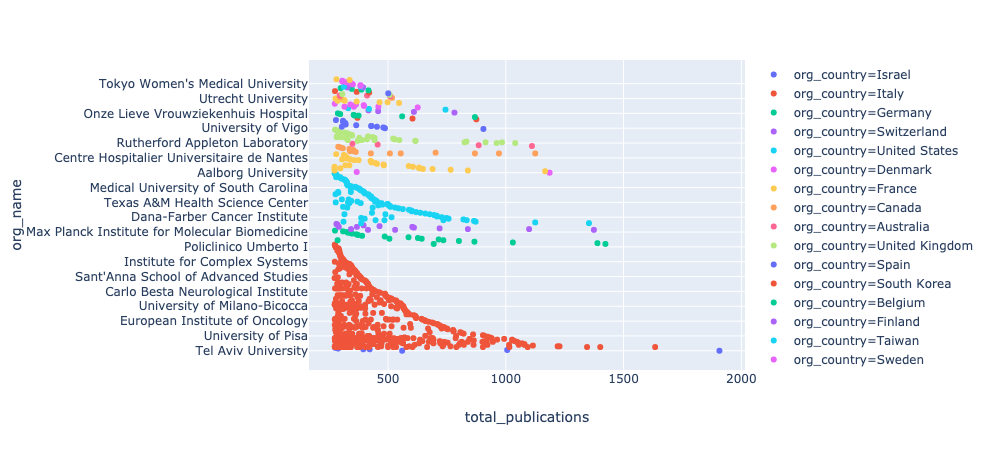

In [28]:
px.scatter(df_minus_rome, y="org_name", x="total_publications",  hover_name="full_name", 
           color="org_country", hover_data=['id', 'total_publications'], height=600, title="")

---
# Activities

* Try repeating the same analysis for a different organization listed in the [Global Research Identifier Database](https://grid.ac/)
* Try modifying the initial result set eg by adding a keyword search `search publications for "malaria" ...` and see how results change

---
# Want to learn more?

Check out the [Dimensions API Lab](https://digital-science.github.io/dimensions-api-lab/) website, which contains many tutorials and reusable Jupyter notebooks for scholarly data analytics. 